# Introduction

In this notebook I used the ObesityData.csv as the dataset, it has 16 features and 7 labels to recogonize whether the patient is obesity or not, and what kind of obesity they got. 
I designed two models to train the dataset, one is RandomForest and another one is NerualNetworks(MLP). After hyperparameter tunning, both the models have over 90% accuracy_score.

## Get started

Import the libararies that we will use later

In [48]:
import pandas as pd #import the pandas library for data manipulation
from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier
from sklearn import datasets
import numpy as np
import seaborn as sns #sns for output Confusion metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # use split to separate trainning and test data
from sklearn.metrics import accuracy_score # import accuracy_score to evaluate models
from sklearn import preprocessing
from sklearn import tree


### Load Dataset

In [110]:
import pandas as pd #import the pandas library for data manipulation

data = pd.read_csv("ObesityData.csv", header=0, na_values=['?'])

# code the categorical features {Gender, family_history_with_overweight,
# FAVC, CAEC, SMOKE, SCC, CALC, MTRANS}
categories = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
# make non digital to digital
for i in categories:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes
    
labels= data.pop('NObeyesdad') #use the last column as label
features=data # use rest of the data as features
features.head(5) #check the first 5 rows of data


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


### pre-processing data

In [50]:
features.isnull().sum()# check missing values
labels.isnull().sum()

0

# Method1: Random Forest Classifier

### Split the data and train the model
I choose to use `max_features` and `n_estimator`s as the hyperparameters for the model. <br/> 
`max_featuresare` the maximum number of features Random Forest is allowed to try in individual tree <br /> 
`n_estimators` is the number of trees we want to build before taking the maximum voting or averages of predictions. 


In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)#take 30% of dataset to test

clf = RandomForestClassifier(max_features=9,n_estimators=100)#RandomForestClassifier
clf.fit(X_train, y_train)


RandomForestClassifier(max_features=9)

### Check Accuracy
use accuracy_score to check the performance of this model

In [66]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9479495268138801

### Hyperparameter Tuning
We can see that the value we choose for the model has a relativaly high accuracy socre, but just incase it's not the optimal value. <br/> In here we use GridSearchCV to achieve hyperparameter tuning

In [53]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
# selected value range for parameters
max_features_range = np.arange(1,10,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)


In [54]:
#fit the data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [62]:
#print best results
print("The best parameters are %s "%(grid.best_params_,))

The best parameters are {'max_features': 9, 'n_estimators': 100} 


So we found the optimal value for those hyperparameters or RandomClassifier

## Results
### outcome metrics for Random Forest
use confusion metrix to evaluate model

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report# import confusion metircs
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[83,  3,  0,  0,  0,  0,  0],
       [ 2, 84,  0,  0,  0,  7,  0],
       [ 0,  1, 96,  3,  0,  1,  1],
       [ 0,  0,  2, 86,  0,  0,  0],
       [ 0,  0,  0,  1, 97,  0,  0],
       [ 0,  8,  0,  0,  0, 78,  2],
       [ 0,  0,  0,  0,  0,  2, 77]])

### Confusion metrics

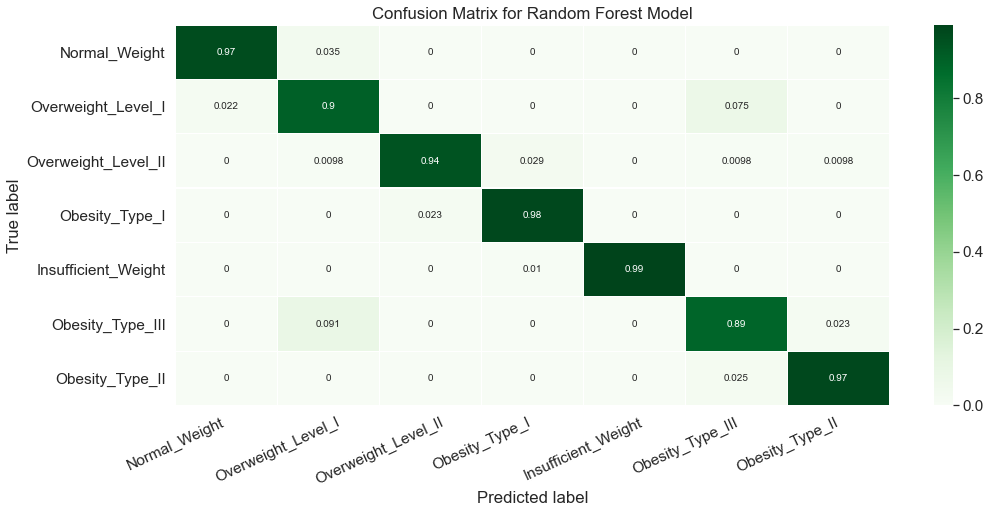

In [68]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
               'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_III',    
               'Obesity_Type_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Classification report

In [69]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.88      0.90      0.89        93
           2       0.98      0.94      0.96       102
           3       0.96      0.98      0.97        88
           4       1.00      0.99      0.99        98
           5       0.89      0.89      0.89        88
           6       0.96      0.97      0.97        79

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Method2: Nerual Network MLP Classifier

import model 

In [81]:
from sklearn.neural_network import MLPClassifier

split data 

In [102]:
x1_train, x1_test, y1_train, y1_test = train_test_split(features, labels, test_size=0.2)#take 30% of dataset to test
#split dataset


### Hyperparameter Tuning

Let's build a MLPClassifier for hyperparameter tuning

In [106]:
mlp = MLPClassifier()

Define a hyper-parameter space to search. It contains ll the values that we want to try out.

In [107]:
import numpy as np
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

Note: the `max_iter=100` that we defined on the initializer is not in the grid. So, that number will be constant, while the ones in the grid will be searched.

In [111]:
#Run the search
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x1_train, y1_train)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

### see the best results

In [112]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


After finding the optimal value, we could apply them to our model

In [113]:
nn_clf=MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes= (50, 100, 50), learning_rate='adaptive', solver='adam',random_state=1,max_iter=100000,)

In [114]:
#fit the trainning data
nn_clf.fit(x1_train,y1_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive', max_iter=100000, random_state=1)

In [116]:
#get predicted data
y1_pred = nn_clf.predict(x1_test)

check the accuracy score

In [117]:
accuracy_score(y1_test,y1_pred)

0.9267139479905437

We can also all the other results

In [93]:
#All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.496 (+/-0.084) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.827 (+/-0.070) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.457 (+/-0.032) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.829 (+/-0.061) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.450 (+/-0.068) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.815 (+/-0.073) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.501 (+/-0.116) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

## Results

### outcome metrics for MLP

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report# import confusion metircs
# View confusion matrix for test data and predictions
confusion_matrix(y1_test, y1_pred)

array([[49,  1,  0,  0,  0,  0,  0],
       [ 3, 50,  0,  0,  0,  5,  4],
       [ 0,  0, 68,  0,  1,  0,  0],
       [ 0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0],
       [ 0,  2,  0,  0,  0, 48,  7],
       [ 0,  0,  5,  0,  0,  3, 42]])

### Confusion metrics

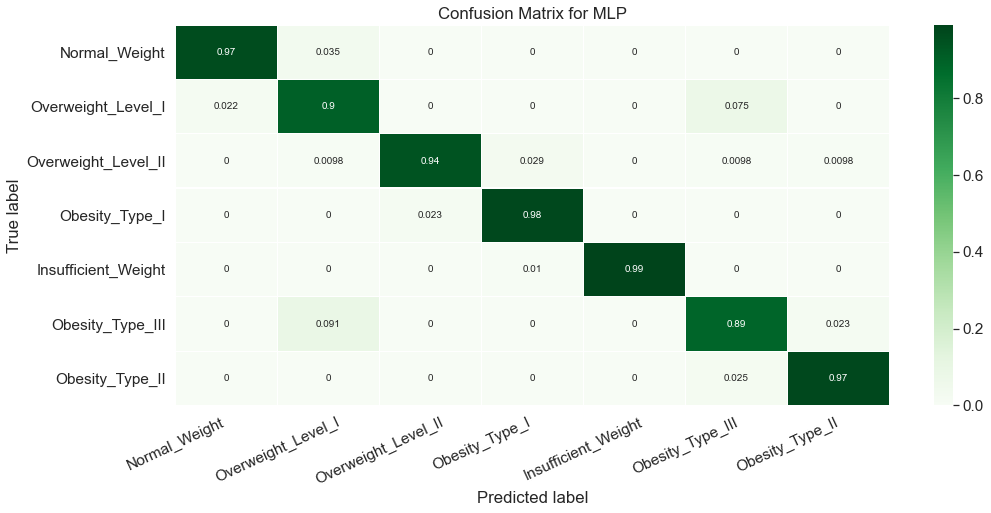

In [119]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
               'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_III',    
               'Obesity_Type_II']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLP')
plt.show()

### Classification report

In [120]:
# View the classification report for test data and predictions
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.94      0.81      0.87        62
           2       0.93      0.99      0.96        69
           3       1.00      1.00      1.00        61
           4       0.99      1.00      0.99        74
           5       0.86      0.84      0.85        57
           6       0.79      0.84      0.82        50

    accuracy                           0.93       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.93      0.93      0.93       423



# compare the two model

From accuracy socre and outcome metrix, we can see that the Random Forest has a overall better performance